In [17]:
import numpy as np
import random

In [18]:
# Define Class Adam Optimizer
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1)
        m_db_corr = self.m_db/(1-self.beta1)
        v_dw_corr = self.v_dw/(1-self.beta2)
        v_db_corr = self.v_db/(1-self.beta2)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [19]:
def loss_function(m):
    return m**2-2*m+1

## take derivative
def grad_function(m):
    return 2*m-2

def check_convergence(w0, w1):
    return (w0 == w1)

In [20]:
# Initialize w_0 and b_0 with random values using function
w_0 = random.random()
b_0 = random.random()
adam = AdamOptim()
# Initialize iteration with 1
t = 1
converged = False
x = []
l = []
while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    loss = loss_function(w_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0)+':loss='+str(loss))
        l.append(loss)
        x.append(t)
        t+=1


iteration 1: weight=0.1659443771679522:loss=0.7124298943343961
iteration 2: weight=0.17937835273514294:loss=0.6956487819777551
iteration 3: weight=0.1950160000781907:loss=0.6734198879596875
iteration 4: weight=0.21218563248517458:loss=0.6479992401301155
iteration 5: weight=0.2304460018127515:loss=0.6206514776627844
iteration 6: weight=0.24948069963824404:loss=0.5922133561259797
iteration 7: weight=0.26905109351021916:loss=0.5632792202154997
iteration 8: weight=0.2889713356525734:loss=0.5342863038986063
iteration 9: weight=0.3090935229266421:loss=0.5055617615236855
iteration 10: weight=0.32929817101485476:loss=0.4773517600619184
iteration 11: weight=0.3494877390611979:loss=0.44984094340401903
iteration 12: weight=0.36958203069119155:loss=0.42316620163171215
iteration 13: weight=0.3895148131121504:loss=0.3974268160274418
iteration 14: weight=0.4092312618141587:loss=0.3726921634094926
iteration 15: weight=0.42868598495206106:loss=0.34900770201769116
iteration 16: weight=0.4478414668589918

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


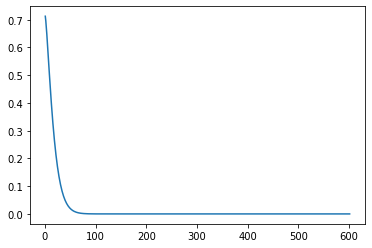

In [21]:
import matplotlib.pyplot as plt
plt.plot(x,l)

In [22]:
## MOMENTUM GRADIENT DESCENT OPTIMIZER

import math

# HyperParameters of the optimization algorithm
alpha = 0.01
beta = 0.9

# Objective function
def obj_func(x):
 return x * x - 4 * x + 4
 
# Gradient of the objective function
def grad(x):
 return 2 * x - 4
 
# Parameter of the objective function
x = 0
iterations = 0

v = random.random()
k = []
l2 = []
while (1):
 iterations += 1
 v = beta * v + (1 - beta) * grad(x)
 loss = loss_function(v)
 x_prev = x
 
 x = x - alpha * v
 
 print('iteration '+str(iterations)+': weight='+str(x-1) + ':loss=' + str(loss))
 k.append(iterations)
 l2.append(loss)
 if x_prev == x:
  print('converged after '+str(iterations)+' iterations')
  break


iteration 1: weight=-0.9980842261182926:loss=1.4198566719997956
iteration 2: weight=-0.9923638611725194:loss=2.471298740282954
iteration 3: weight=-0.9832308049989785:loss=3.6607383853987288
iteration 4: weight=-0.9710445928327937:loss=4.922280102829664
iteration 5: weight=-0.9561349126975618:loss=6.20492164439567
iteration 6: weight=-0.938803930750458:loss=7.469825741929159
iteration 7: weight=-0.9193284391365636:loss=8.688046058807572
iteration 8: weight=-0.8979618398057855:loss=9.838635535775666
iteration 9: weight=-0.8749359767284737:loss=10.907076320013484
iteration 10: weight=-0.850462828005436:loss=11.883979828806682
iteration 11: weight=-0.8247360684986914:loss=12.764013448527729
iteration 12: weight=-0.7979325128056238:loss=13.545017116527294
iteration 13: weight=-0.7702134476562517:loss=14.227278757425768
iteration 14: weight=-0.7417258621265043:loss=14.812942399096206
iteration 15: weight=-0.7126035834254786:loss=15.305526907607263
iteration 16: weight=-0.6829683254277046:lo

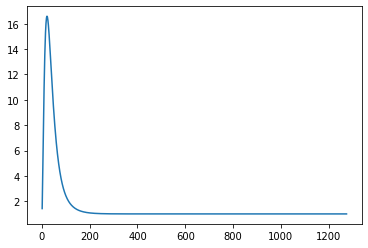

In [23]:
import matplotlib.pyplot as plt
plt.plot(k,l2)